<a href="https://colab.research.google.com/github/Moxa13patel/task-8-k-mean-clustering/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###importing libraries required

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

###loading data

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


###standerizing the data

In [8]:
#  Drop non-numeric columns for PCA
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

###PCA to reduce to 2D

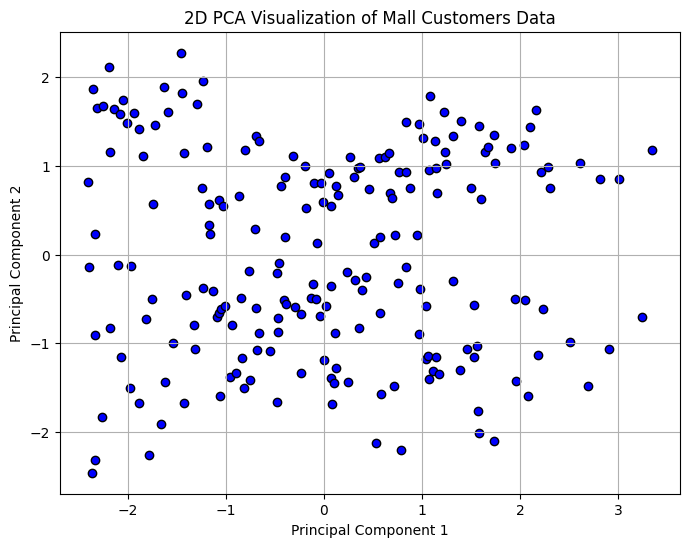

In [9]:
#  Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#  Plot the 2D PCA result
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization of Mall Customers Data')
plt.grid(True)
plt.show()

### fit k mean

In [12]:
#  Fit K-Means model (let's choose 3 clusters for example)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)

#  Assign cluster labels to original dataframe
df['Cluster'] = kmeans.labels_

#  View updated dataframe with clusters
print(df[['CustomerID', 'Cluster']].head())

   CustomerID  Cluster
0           1        2
1           2        2
2           3        2
3           4        2
4           5        2


###elbow method to find optional k value

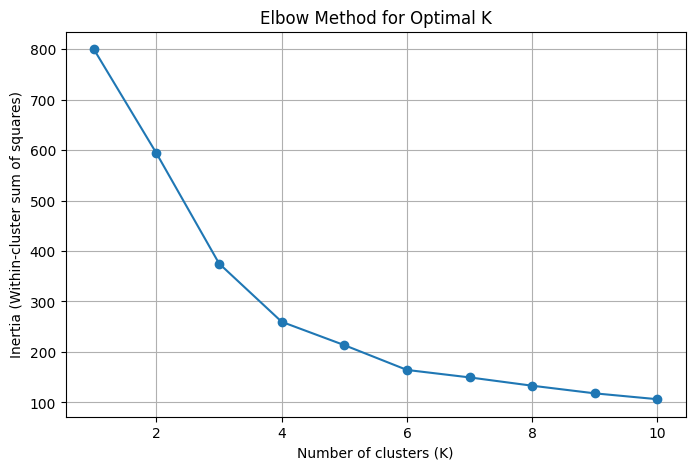

In [13]:
# List to store sum of squared distances (inertia)
inertia = []

# Try K values from 1 to 10
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.show()

### visualize cluster with color-coding

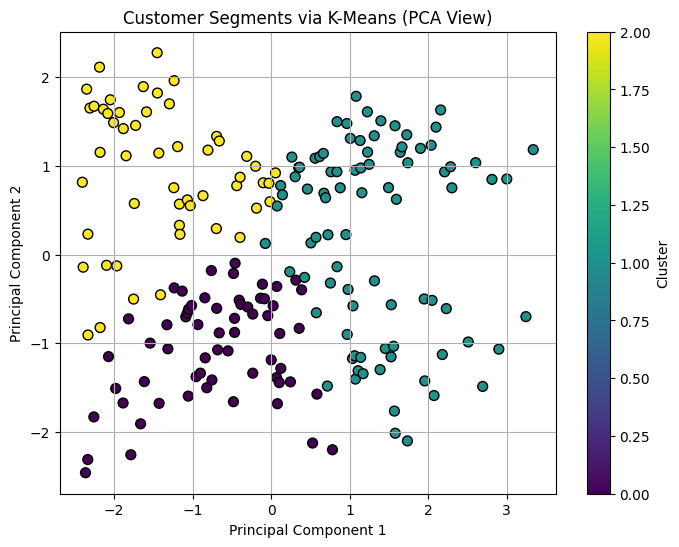

In [14]:
# Plot the PCA-reduced data, color by cluster
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('Customer Segments via K-Means (PCA View)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

### Silhouette Score

In [17]:
score = silhouette_score(scaled_data, df['Cluster'])

print(f'Silhouette Score for K={kmeans.n_clusters}: {score:.3f}')

Silhouette Score for K=10: 0.336


In [18]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.267
K=3, Silhouette Score=0.336
K=4, Silhouette Score=0.414
K=5, Silhouette Score=0.402
K=6, Silhouette Score=0.430
K=7, Silhouette Score=0.408
K=8, Silhouette Score=0.392
K=9, Silhouette Score=0.384
K=10, Silhouette Score=0.369
